<a href="https://colab.research.google.com/github/Sharath-Sabbani/Minor-Project/blob/main/Minor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Price Prediction of Crops

## Importing Libraries:
To Work on this Project we will be using few Python libraries such as -
1.   Numpy : NumPy is mostly used for working with Numerical values as it makes it easy to apply mathematical functions and also To work with any dimension Arrays with out much complexity.
2.   Pandas : Pandas is mostly used for data analysis tasks in Python i.e, To work with DataFrame of ".csv" files and to manipulate contents in a table.
3.   Matplot (matplotlib) : 'matplotlib.pyplot' is a collection of functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure like creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc..
4.   Scikit Learn (sklearn) : 'linear_model' and 'model_selection' are classes of the sklearn module they contain different functions for performing machine learning with linear models. The term linear model implies that the model is specified as a linear combination of features.
'linear_model' class is used to import Linear Regression class which is used to predict the values. 'model_selection' class is used to import train_test_split subclass to Split the dataset into both training set and test set



In [546]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Importing Datasets

In [547]:
data_set = pd.read_csv("Sheet1.csv")

Paddy = data_set.iloc[:,:3]
Paddy["Paddy"]=data_set.Paddy

Cotton = data_set.iloc[:,:3]
Cotton["Cotton"]=data_set.Cotton

Wheat = data_set.iloc[:,:3]
Wheat["Wheat"]=data_set.Wheat

Groundnut = data_set.iloc[:,:3]
Groundnut["Groundnut"]=data_set.Groundnut

## Crop Selection

In [548]:
Crop = Groundnut

## Handling Missing Data

In [549]:
Crop.isnull().sum()
Crop.shape

(60, 4)

In [550]:
dummy =pd.DataFrame([[]])
for i in range (1,13):
  temp = pd.DataFrame(Crop[Crop.Month == i])
  temp.Rainfall.fillna(temp.Rainfall.mean(),inplace=True)
  dummy = pd.concat([dummy,temp])

In [551]:
dummy.reset_index(drop=True,inplace=True)
dummy.drop(0,inplace=True)

In [552]:
dummy.reset_index(drop=True,inplace=True)
dummy.isnull().sum()
dummy.shape

(60, 4)

In [553]:
Crop = dummy

In [554]:
Crop[Crop.Year == 2022]

,Month,Year,Rainfall,Groundnut
4,1.0,2022.0,21.550,167.3
9,2.0,2022.0,18.225,165.7
14,3.0,2022.0,26.800,169.1
19,4.0,2022.0,36.375,171.2
24,5.0,2022.0,73.400,174.3
29,6.0,2022.0,164.125,171.0
34,7.0,2022.0,277.100,172.0
39,8.0,2022.0,269.575,175.3
44,9.0,2022.0,209.750,175.2
49,10.0,2022.0,91.600,175.2


## Training the Model

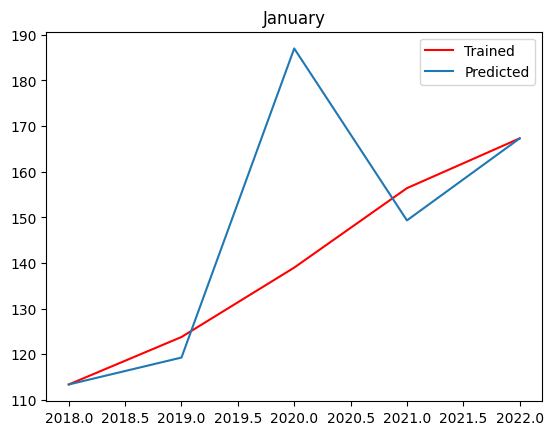

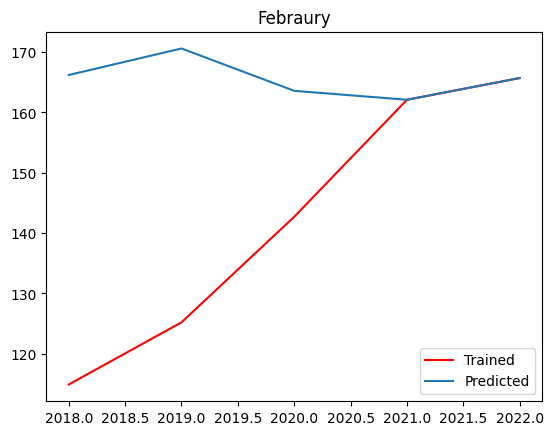

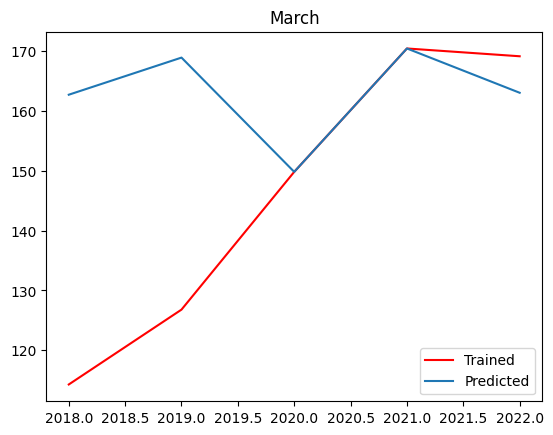

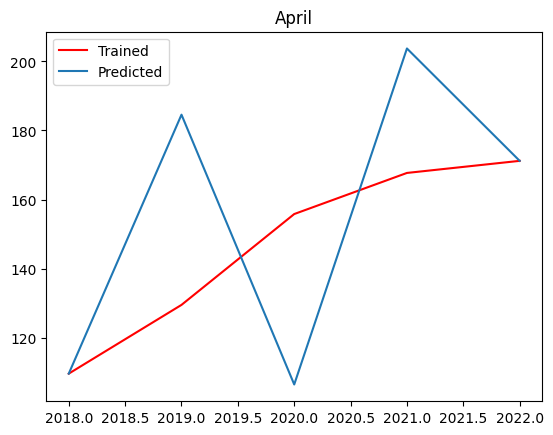

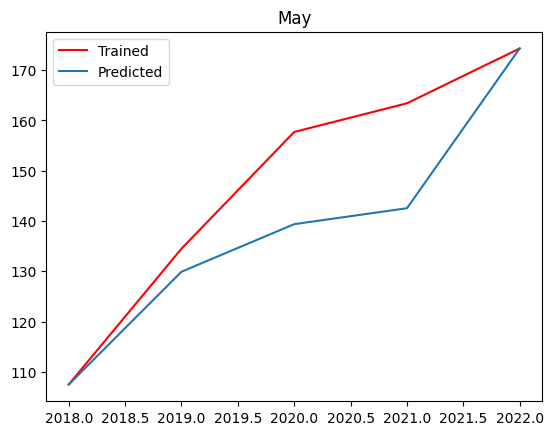

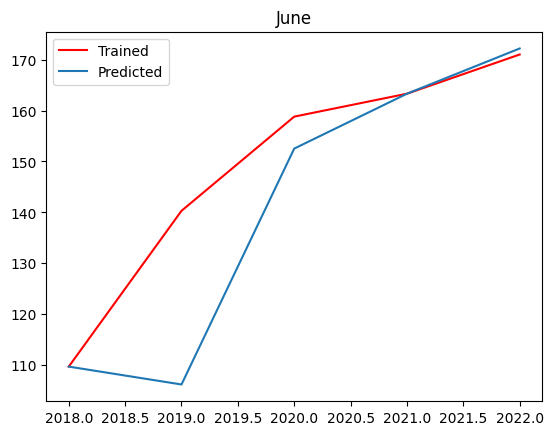

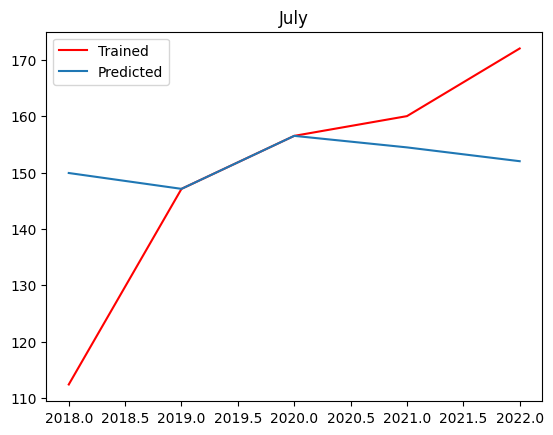

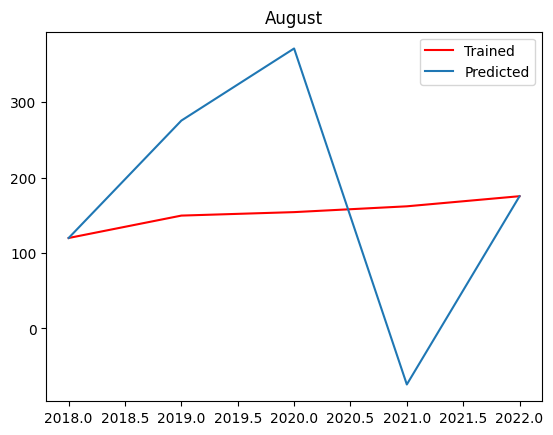

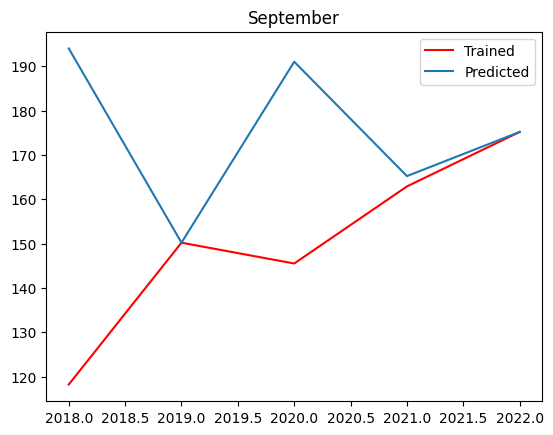

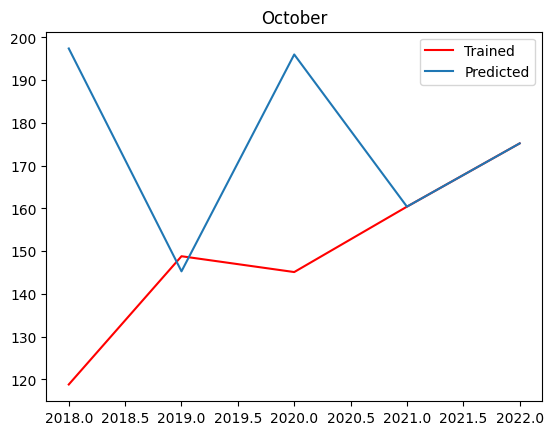

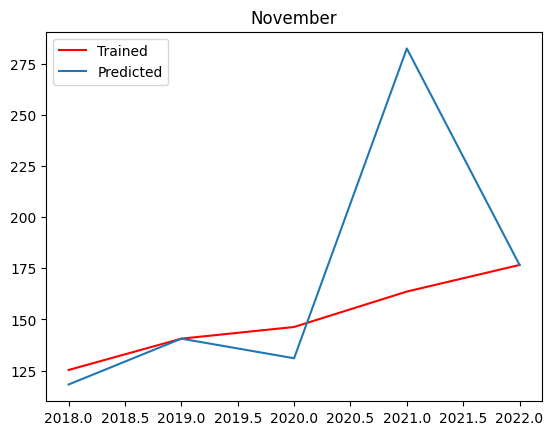

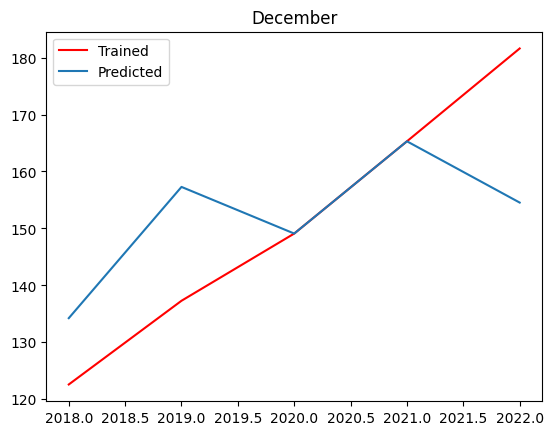

In [555]:
for i in range(1,13):
  month_split = Crop[Crop.Month == i]
  X = month_split.iloc[:,:3]
  Y = month_split.iloc[:,-1]

  X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.6,random_state=42+i)

  regressor = LinearRegression()
  regressor.fit(X_train,Y_train)
  def switch(lang):
    if lang == 1:
        return "January"
    elif lang == 2:
        return "Febraury"
    elif lang == 3:
        return "March"
    elif lang == 4:
        return "April"
    elif lang == 5:
        return "May"
    elif lang == 6:
        return "June"
    elif lang == 7:
        return "July"
    elif lang == 8:
        return "August"
    elif lang == 9:
        return "September"
    elif lang == 10:
        return "October"
    elif lang == 11:
        return "November"
    elif lang == 12:
        return "December"
  name = switch(i)
  plt.title(name);
  plt.plot(X["Year"],Y,"r",label="Trained")
  plt.plot(X["Year"],regressor.predict(X),label="Predicted")
  plt.legend()
  plt.show()
  # plt.title(name)
  # plt.plot(X_train["Year"],Y_train,"r",label="Trained")
  # plt.plot(X_train["Year"],regressor.predict(X_train),label="Predicted")
  # plt.legend()
  # plt.show()

## Predicting the price

In [556]:
Y_Pred = regressor.predict([[7.0,2024.0,160.54]])
Y_Pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([768.23343396])